<a href="https://colab.research.google.com/github/raj-hero/UGProject/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('load.csv')

In [ ]:
df['Datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['Datetime'])
del df['datetime']
# df

In [ ]:
scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']]=scaler.fit_transform(df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']])
# df

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Split data into training and testing sets
train_size = int(len(df) * 0.75)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

In [ ]:
from xgboost import XGBRegressor

In [ ]:
Regressor=XGBRegressor(n_estimators =200,random_state = 0)
Regressor.fit(train_X,train_y)
y_pred=Regressor.predict(test_X)


In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
print('mape mean:', np.mean(mape), '%.')
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.07
mape mean: 10.76416907777498 %.
Accuracy: 89.24 %.


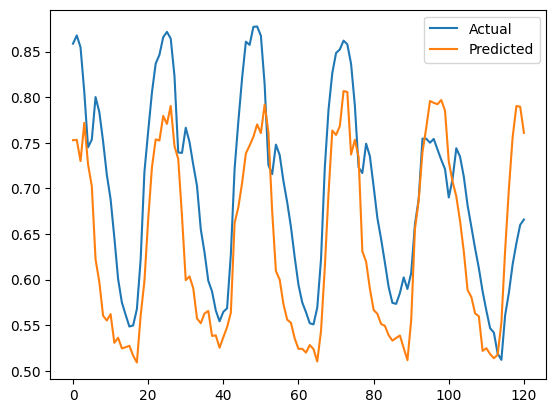

In [ ]:
plt.plot(test_y[0:121], label='Actual')
plt.plot(y_pred[0:121], label='Predicted')
plt.legend()
plt.show()

In [ ]:
plt.plot(test_y[0:121], label='Actual')
plt.plot(y_pred[0:121], label='Predicted')
plt.legend()
plt.show()

In [ ]:
Regressor2=XGBRegressor(n_estimators = 1000,
                          learning_rate = 0.05,
                          max_depth = 5,
                          subsample = 0.8)
Regressor2.fit(train_X,train_y)
y_pred2=Regressor2.predict(test_X)


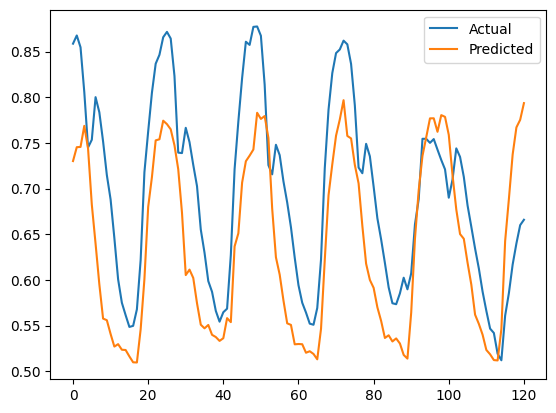

In [ ]:
plt.plot(test_y[0:121], label='Actual')
plt.plot(y_pred2[0:121], label='Predicted')
plt.legend()
plt.show()